<a href="https://colab.research.google.com/github/aciofo/AI-Engineering/blob/main/machine-learning-fundamentals/clustering/clustering_exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Clustering the customers of a shopping mall
In this exercise you will segment the customers of a shopping mall using the dataset that you can find here.

The information you have is:

CustomerID: customer identification code.

*   CustomerID: customer identification code
*   Gender: customer gender
*   Age: customer age
*   Annual Income (k$): customer annual income in 1000 dollars
*   Spending Score (1-100): score assigned to the customer based on spending


To segment the customers you must create a clustering model using the kmeans algorithm, make more than one, using the following information:



1.   Age and Spending Score
2.   Annual Income and Spending Score
3.   Age, Annual Income and Spending Score


For each model use the Elbow Method to determine the number of clusters and visualize the clusters using a scatterplot.
Use the last model to associate these customers to a cluster, export the result to an EXCEL file called mall_customers_prediction.xlsx containing two columns:


*   CustomerID: the customer identification code
*   Customer Group: the cluster to which they belong

In [74]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
plt.rcParams["figure.figsize"] = (16,10)
sns.set_theme(palette="dark")

In [76]:
BASE_URL = "https://raw.githubusercontent.com/ProfAI/machine-learning-fondamenti/main/datasets/"
random_seed = 1

In [77]:
df = pd.read_csv(BASE_URL+"mall_customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [78]:
x = df[["Annual Income (k$)", "Spending Score (1-100)"]].values

In [79]:
def plot_ssd_curve(data):

  ssd = {}
  for k in range(1, 10):
      kmeans = KMeans(init="k-means++", n_clusters=k, random_state=random_seed).fit(data)
      ssd[k] = kmeans.inertia_
  plt.figure()
  plt.plot(list(ssd.keys()), list(ssd.values()),marker='o')
  plt.xlabel("Number of clusters", fontsize=16)
  plt.ylabel("SDD", fontsize=16)
  plt.show()

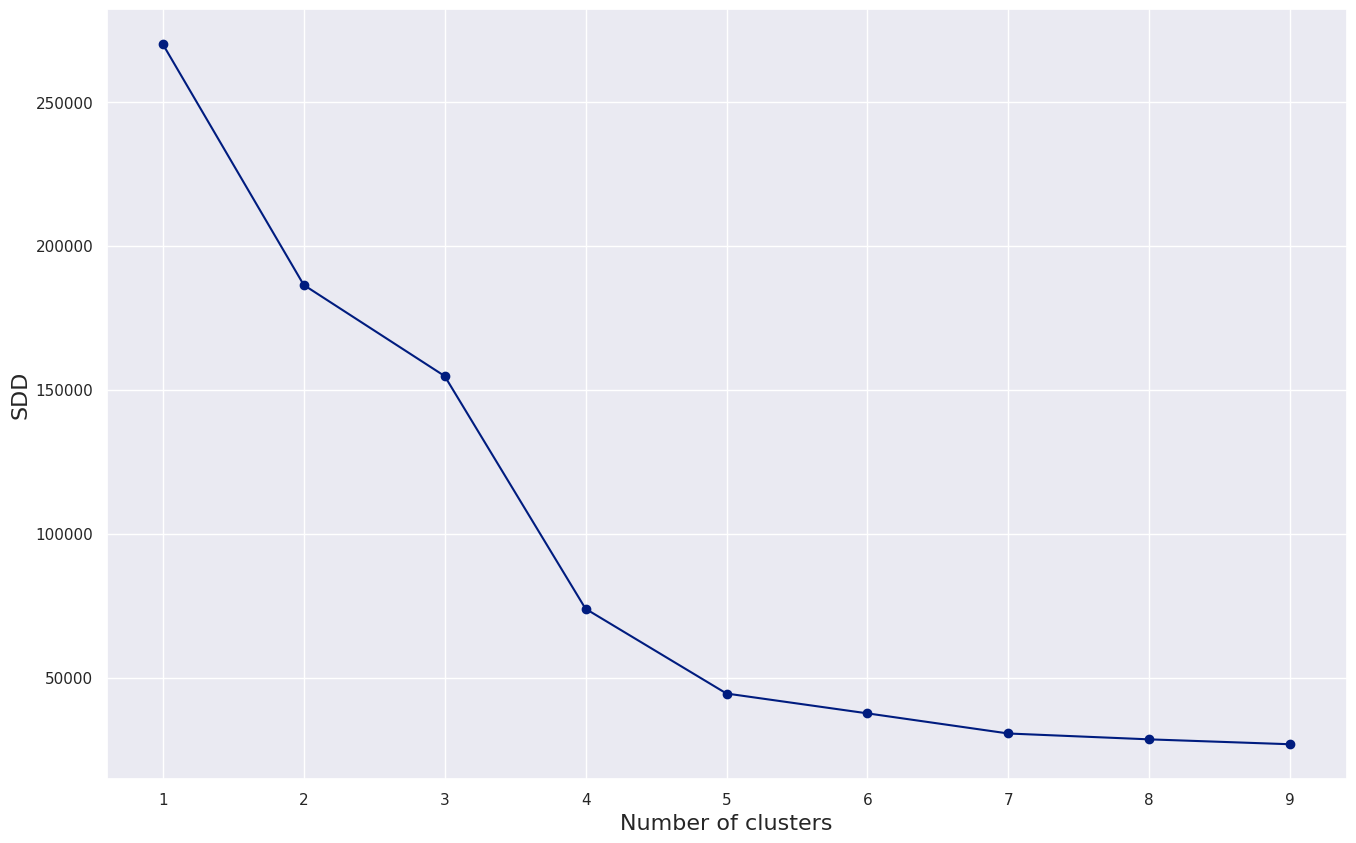

In [80]:
plot_ssd_curve(x)

In [81]:
def plot_clusters(model, data, axlabels=None, print_ssd=False):
  y_pred = model.predict(data)
  sns.scatterplot(x=data[:,0], y=data[:,1], hue=y_pred, s=100)
  plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], c='red', s=200, alpha=0.5)

  if axlabels!=None:
    plt.xlabel(axlabels[0], fontsize=16)
    plt.ylabel(axlabels[1], fontsize=16)

  if print_ssd:
    plt.text(x[:,0].max()-10, 0, f"SSD={model.inertia_:.2f}")

  plt.show()

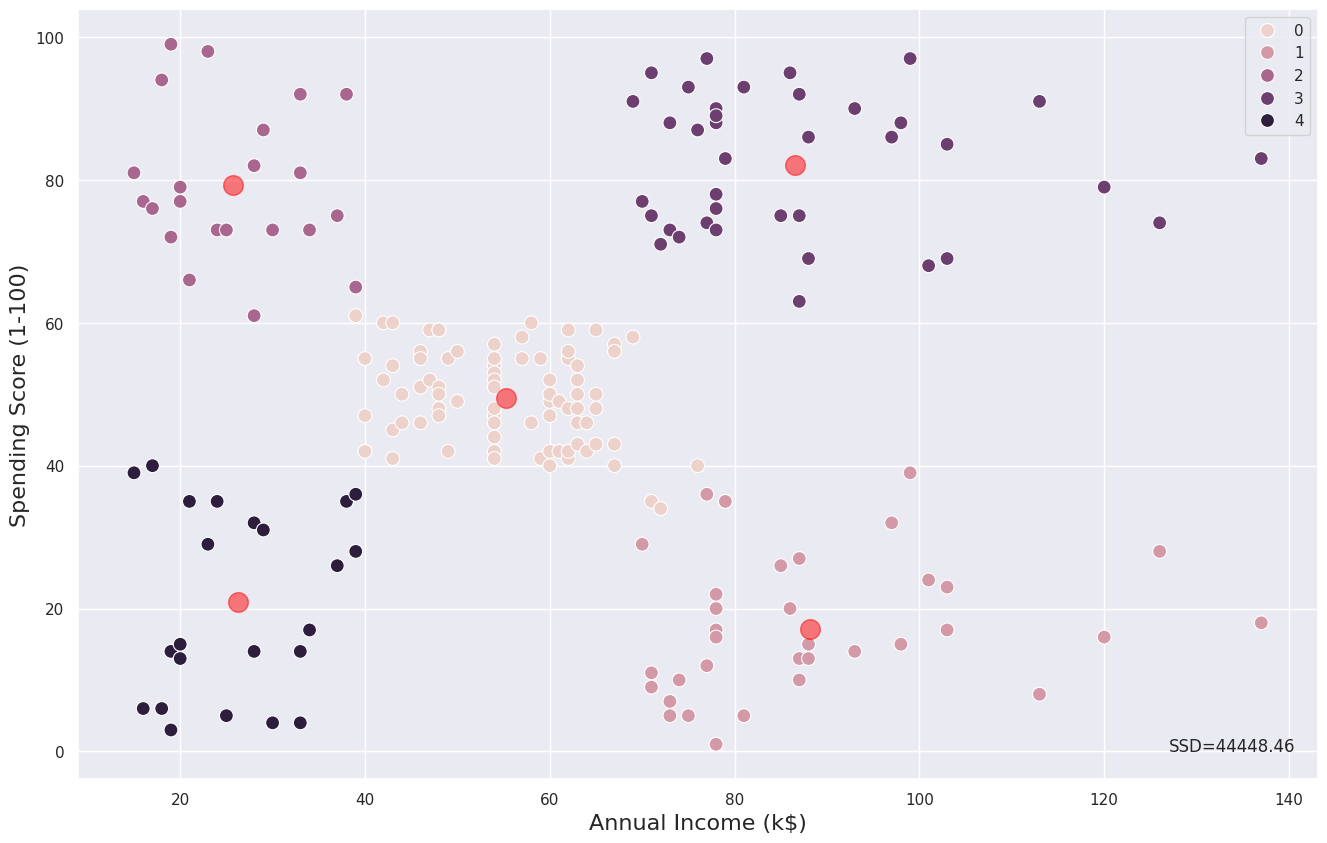

In [82]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = random_seed)
kmeans.fit(x)
plot_clusters(kmeans, x, axlabels=["Annual Income (k$)","Spending Score (1-100)"], print_ssd=True)

In [83]:
x = df[["Age", "Spending Score (1-100)"]].values

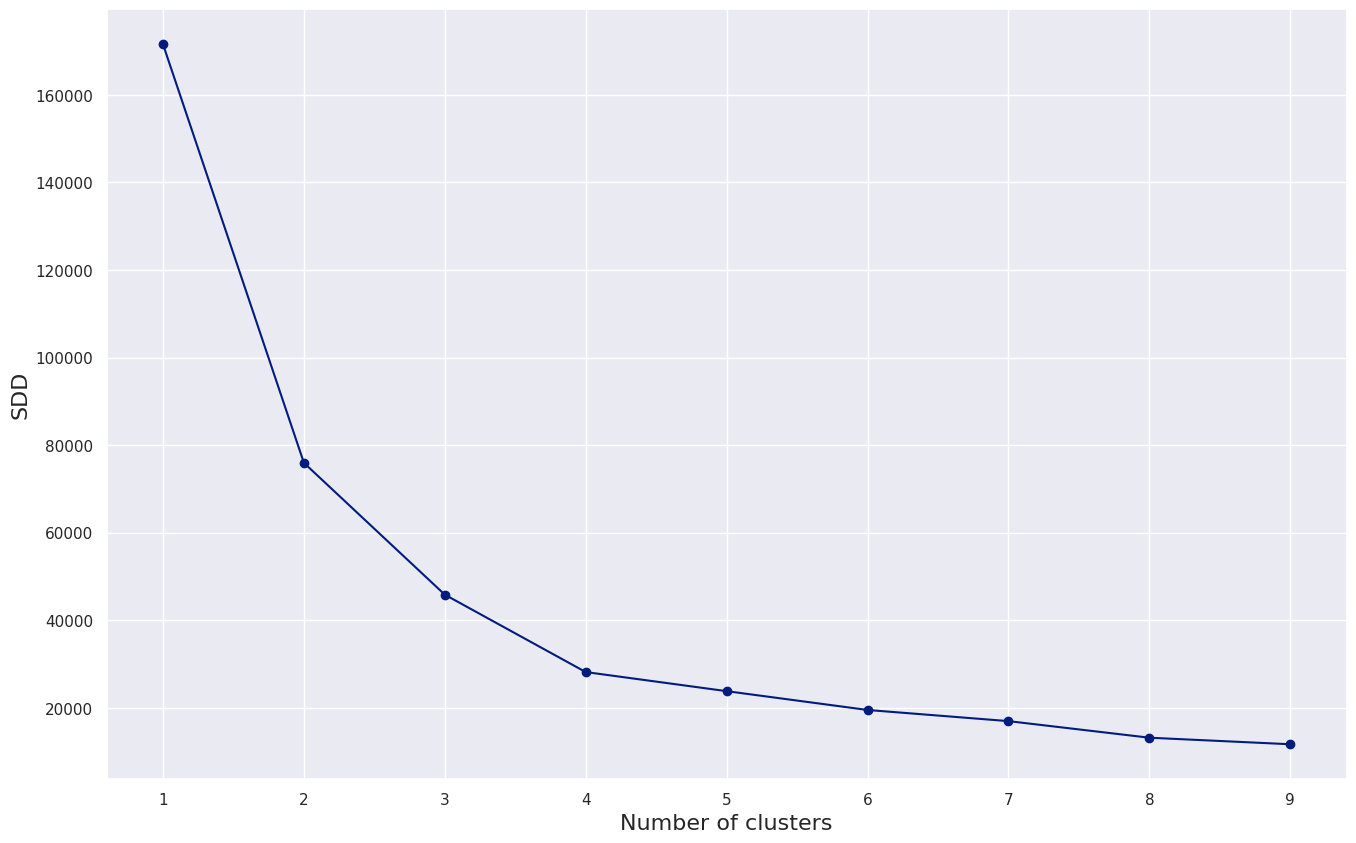

In [84]:
plot_ssd_curve(x)

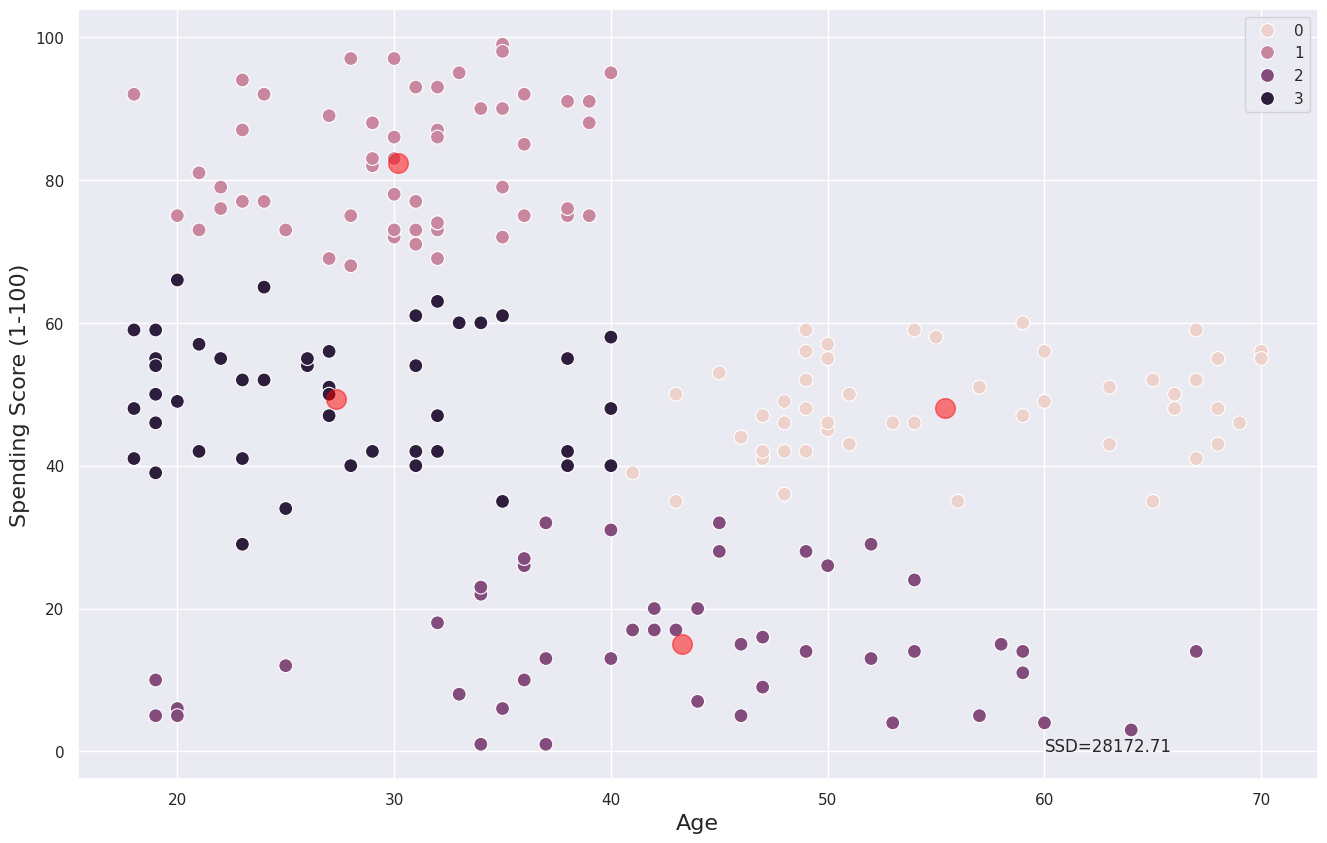

In [85]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = random_seed)
kmeans.fit(x)
plot_clusters(kmeans, x, axlabels=["Age","Spending Score (1-100)"], print_ssd=True)

In [86]:
x = df[[ "Age", "Spending Score (1-100)", "Annual Income (k$)"]].values

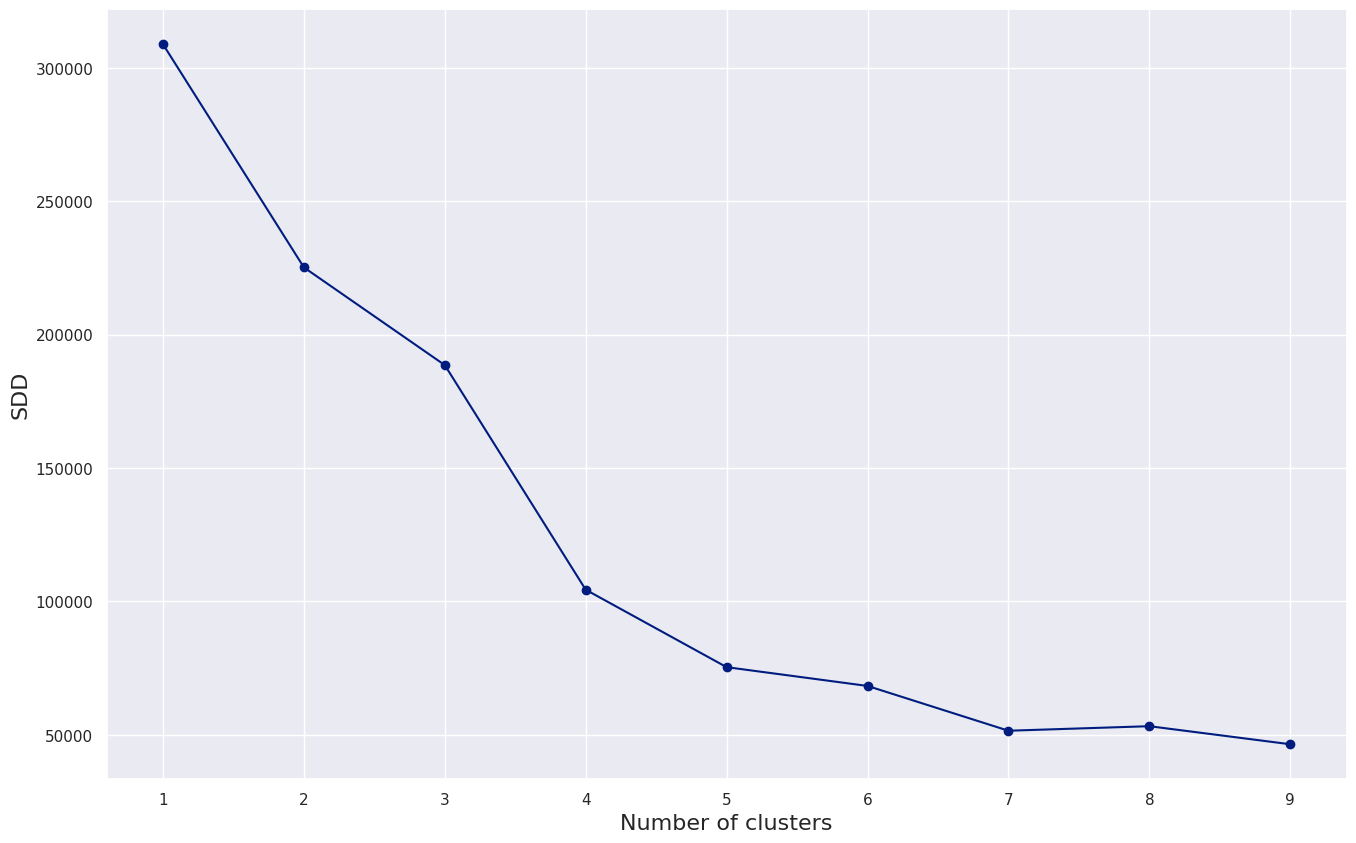

In [87]:
plot_ssd_curve(x)

In [89]:
from mpl_toolkits import mplot3d

In [94]:
%matplotlib notebook

In [95]:
def plot_clusters3d(model, data, axlabels=None):
  y_pred = model.predict(data)

  ax = plt.axes(projection ="3d")
  ax.scatter3D(data[:,0], data[:,1], data[:,2], edgecolors= "black", c=y_pred)
  ax.scatter3D(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:,2], color="red", s=100)

In [97]:
kmeans = KMeans(n_clusters = 6, init = 'k-means++', random_state = random_seed)
kmeans.fit(x)
plot_clusters3d(kmeans, x, axlabels=["Age","Spending Score (1-100)"])

In [98]:
df_pred = pd.read_csv(BASE_URL+"mall_customers_predict.csv")
df_pred.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,40,71,95
1,2,Male,36,87,10
2,3,Female,50,58,46
3,4,Male,47,71,9
4,5,Female,29,98,88


In [99]:
X = df_pred[[ "Age", "Spending Score (1-100)", "Annual Income (k$)"]].values

In [100]:
y_pred = kmeans.predict(X)
y_pred

array([3, 5, 0, 5, 3], dtype=int32)

In [101]:
df_result = pd.DataFrame({
    "CustomerID":df_pred["CustomerID"],
    "Customer Group":y_pred,
})

df_result.to_excel("mall_customers_prediction.xlsx")